# The Laplace Transform

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Analysis of Passive Electrical Networks

The Laplace transform is a well-established tool for the analysis of differential equations including initial values. [Electrical networks](https://en.wikipedia.org/wiki/Electrical_network) composed of linear passive elements, like resistors, capacitors and inductors can be described mathematically by linear ordinary differential equations (ODEs) with constant coefficients. The Laplace transform provides an elegant way of analyzing such networks. This is illustrated in the following.

### Complex Impedances and Equivalent Networks

The concept of complex impedances is used to analyze passive electrical networks in the Laplace domain. Let's first take a look at the ODEs describing the relation between voltage $u(t)$ and current $i(t)$ for linear passive elements. They are summarized in the second column of the following table

| Element | $\quad \qquad \qquad \quad \quad$ Temporal Domain $\qquad \qquad \qquad \quad \quad$ | $\qquad \qquad$ Laplace Domain $\qquad \qquad$ | Impedance $Z(s)$ |
|:---:|:---:|:---:|:---:|
| ![Resistor](resistor.png) | $u(t) = R \cdot i(t)$ | $U(s) = R \cdot I(s)$ | $R$ |
| ![Inductor](inductor.png) | $\begin{matrix} u(t) = L \frac{d}{dt} i(t) \\ i(t) = \frac{1}{L} \int_{0}^{t} u(\tau) d\tau + i(0+) \epsilon(t) \end{matrix}$ | $\begin{matrix} U(s) = s L I(s) - L i(0+) \\ I(s) = \frac{1}{s L} U(s) + \frac{1}{s} i(0+) \end{matrix}$ | $s L$ |
| ![Capacitor](capacitor.png) | $\begin{matrix} u(t) = \frac{1}{C} \int_{0}^{t} i(\tau) d\tau + u(0+) \epsilon(t) \\ i(t) = C \frac{d}{dt} u(t) \end{matrix}$ | $\begin{matrix} U(s) = \frac{1}{s C} I(s) + \frac{1}{s} u(0+) \\ I(s) = s C U(s) - C u(0+) \end{matrix}$ | $\frac{1}{s C}$

It was assumed that the voltage $u(t)=0$ and current $i(t)=0$ for $t < 0$, hence that both are causal signals. The initial values $u(0+)$ and $i(0+)$ denote their right-sided limit values for $t=0$. For instance $u(0+) = \lim_{\epsilon \to 0} u(0 + \epsilon)$. They initial values represent the energy stored in the capacitors and inductors at time instant $t=0$, respectively. The analysis of a passive electrical network is performed by applying [Kirchhoff's circuit laws](https://en.wikipedia.org/wiki/Kirchhoff's_circuit_laws) resulting in an ODE, describing the relation between input and output voltage for instance. This ODE has to be solved explicitly. See for instance the [previous network analysis example](../systems_time_domain/network_analysis.ipynb).

The time-domain relations can be transformed into the Laplace domain by applying the [differentiation and integration theorem](table_theorems_transforms.ipynb#Properties-and-Theorems) of the Laplace transform. The results are summarized in the third column. The differentiation and integration are now represented by algebraic operations. Kirchhoff's circuit laws can be applied straightforwardly to the transformed quantities using the transformed relations. This is due to the fact that the Laplace transform is a linear operation. The result is an algebraic equation that can be solved straightforward with respect to the desired quantities.

When the initial values $i(0+)$ or $i(0+)$ are zero, the elements can be characterized in the Laplace domain by their [complex impedances](https://en.wikipedia.org/wiki/Electrical_impedance). The complex impedance $Z(s)$ is defined as follows

\begin{equation}
Z(s) = \frac{U(s)}{I(s)}
\end{equation}

Complex impedances can be used to represent a passive electrical network in the Laplace domain. The analysis of an electrical network in the Laplace domain is illustrated by the example given in the next section. Note that similar considerations also apply to mechanical systems and other problems that can be described by ODEs.

### Example: Second-Order Low-Pass Filter

The second-order low-pass filter from the [previous example](../systems_time_domain/network_analysis.ipynb) is analyzed using the Laplace transform. First the step response for zero initial values is computed followed by an analysis including initial values in a second stage.

#### Output signal for zero initial values

It is assumed that no energy is stored in the capacitor and inductor for $t<0$. Consequently, the initial values can be discarded. The equivalent network in the Laplace domain is derived by transforming the input $x(t)$ and output $y(t)$, and introducing the complex impedances from above table for its elements.

![Equivalent network in the Laplace domain](lowpass_laplace_domain.png)

Applying [Kirchhoff's circuit laws](https://en.wikipedia.org/wiki/Kirchhoff's_circuit_laws) with the complex impedances of the network elements yields the output signal $Y(s)$ in relation to the input $X(s)$ in the Laplace domain as

\begin{equation}
Y(s) = \frac{1}{LC s^2 + RC s + 1} \cdot X(s)
\end{equation}

This relation is defined in `SymPy` for subsequent evaluation.

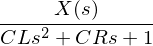

In [1]:
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)

Y = 1/(L*C*s**2 + R*C*s + 1) * X
Y

The response $y(t)$ of the network to a [Heaviside signal](../continuous_signals/standard_signals.ipynb#Heaviside-Signal) at its input, is computed by setting the input to $x(t) = \epsilon(t)$. The Laplace transform $Y(s)$ of the output signal is hence given as

\begin{equation}
Y(s) = \frac{1}{LC s^2 + RC s + 1} \cdot \frac{1}{s}
\end{equation}

The output signal $y(t)$ is computed by inverse Laplace transform of $Y(s)$ for the normalized values $L = .5$, $R = 1$, $C = .4$.

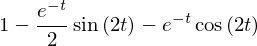

In [2]:
RLC = {R: 1, L: sym.Rational('.5'), C: sym.Rational('.4')}

y = sym.inverse_laplace_transform(Y.subs(RLC).subs(X, 1/s), s, t)
y

The result is simplified for sake of readability

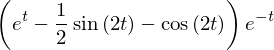

In [3]:
y = y.simplify()
y

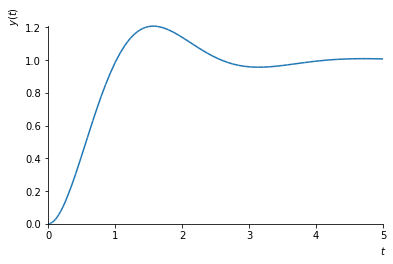

In [4]:
sym.plot(y, (t, 0, 5), xlabel='$t$', ylabel='$y(t)$');

The computation of the output signal $y(t)$ did not require the solution of the underlying ODE as in the [previous example](../systems_time_domain/network_analysis.ipynb). Based on the equivalent network in the Laplace domain, only the computation of an inverse Laplace transform was required. Above result is equal to the [solution of the ODE for an Heaviside signal at the input](../systems_time_domain/network_analysis.ipynb#Step-Response).

#### Output signal including initial values

Now the analysis is performed for non-zero initial values. As initial values, the normalized voltage $u_\text{C}(0+) = -1$ at the capacitor and the normalized current $i_\text{L}(0+) = 0$ at the inductor is assumed. The network is analyzed again using Kirchhoff's circuit laws, but now the initial values are not discarded. Using the Laplace domain representation of the network elements from above table, this results in

\begin{align}
Y(s) &= \underbrace{\frac{1}{L C s^2 + R C s + 1} \cdot X(s)}_{Y_\text{ext}(s)} \\
&+ \underbrace{\frac{R C + L C s}{L C s^2 + R C s + 1} \cdot y(0+) + \frac{L}{L C s^2 + R C s + 1} \cdot i_\text{L}(0+)}_{Y_\text{int}(s)}
\end{align}

where the fact has been used that the initial voltage $u_\text{C}(0+)$ at the capacitor is equal to the initial value of the output $y(0+)$. The index for the current $i_\text{L}(t)$ at the inductor is discarded in the remainder for brevity. The terms have been sorted with respect to their dependence on the input $X(s)$, and the initial values $y(0+)$ and $i(0+)$. The part of the output signal which depends only on the input is termed as *external* part $Y_\text{ext}(s)$. The parts of the output signal which depend only on the initial values are termed as *internal* parts $Y_\text{int}(s)$. The output signal is given as superposition of both contributions

\begin{equation}
y(t) = y_\text{ext}(t) + y_\text{int}(t)
\end{equation}

where $y_\text{ext}(t) = \mathcal{L}^{-1} \{ Y_\text{ext}(s) \}$ and $y_\text{int}(t) = \mathcal{L}^{-1} \{ Y_\text{int}(s) \}$.

The external part of the output signal has already been computed in the previous section

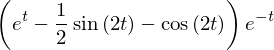

In [5]:
yext = y
yext.simplify()

The Laplace transform of the internal part $Y_\text{int}(s)$ is defined for evaluation

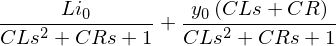

In [6]:
i0, y0 = sym.symbols('i0 y0', real=True)

Yint = (R*C + L*C*s) / (L*C*s**2 + R*C*s + 1) * y0 + L / (L*C*s**2 + R*C*s + 1) * i0
Yint

Now the inverse Laplace transform is computed for the initial values $y(0+)$ and $i(0+)$, and the specific values of $R$, $L$ and $C$ given above

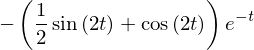

In [7]:
yint = sym.inverse_laplace_transform(Yint.subs(RLC).subs(i0, 0).subs(y0, -1), s, t)
yint

The output signal $y(t)$ is given as superposition of the external and internal contribution

In [8]:
y = yext + yint
y.simplify()

The internal $y_\text{int}(t)$ (green line) and external $y_\text{ext}(t)$ (blue line) part, as well as the output signal $y(t)$ (red line) is plotted for illustration

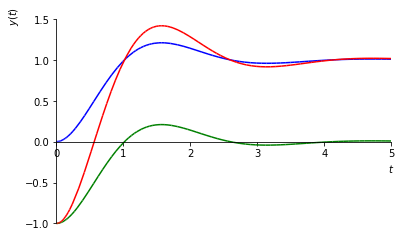

In [9]:
p1 = sym.plot(yext, (t, 0, 5), line_color='b', xlabel='$t$', ylabel='$y(t)$', show=False)
p2 = sym.plot(yint, (t, 0, 5), line_color='g', show=False)
p3 = sym.plot(y, (t, 0, 5), line_color='r', show=False)
p1.extend(p2)
p1.extend(p3)
p1.show()

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.